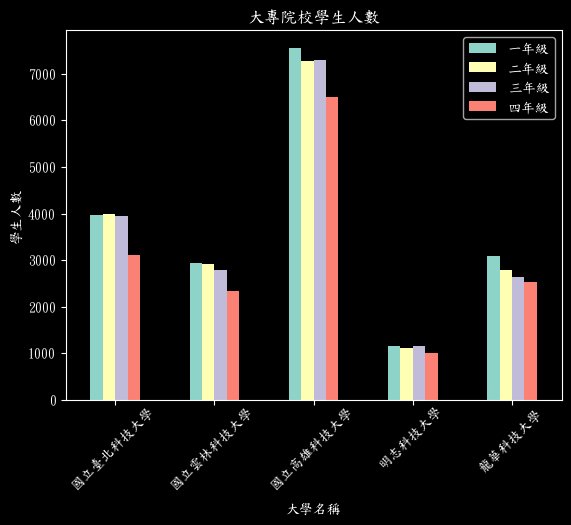

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://stats.moe.gov.tw/files/detail/111/111_student.csv')

schoolName = ['國立臺北科技大學','明志科技大學','龍華科技大學','國立雲林科技大學','國立高雄科技大學']
student = ['一年級男生','一年級女生','二年級男生','二年級女生','三年級男生','三年級女生','四年級男生','四年級女生']

data = data[data['學校名稱'].isin(schoolName)]

data = data[['學校名稱'] + student]
data = data.replace(',','', regex=True).replace('-','0', regex=True)
dfSchoolName = data['學校名稱']
data = data.drop(['學校名稱'], axis=1)
data = data.astype(int)
data['學校名稱'] = dfSchoolName

data = data.groupby('學校名稱').sum()

student_data = pd.DataFrame()
student_grade = ['一年級', '二年級', '三年級', '四年級']
for i in range(len(student_grade)):
    student_data[student_grade[i]] = data[student[i]] + data[student[i+1]]

student_data.plot(kind='bar')
plt.rcParams['font.sans-serif'] = ['DFKai-SB']
plt.xticks(rotation=45)
plt.title('大專院校學生人數')
plt.xlabel('大學名稱')
plt.ylabel('學生人數')
plt.show()

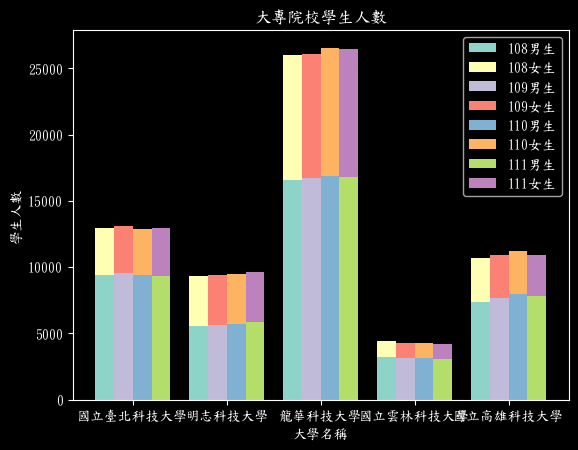

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import fontManager
from functools import reduce

years = [108, 109, 110, 111]
schoolName = ['國立臺北科技大學','明志科技大學','龍華科技大學','國立雲林科技大學','國立高雄科技大學']
student = ['一年級男生','一年級女生','二年級男生','二年級女生','三年級男生','三年級女生','四年級男生','四年級女生']
student_grade = ['一年級', '二年級', '三年級', '四年級']
key = ['男生', '女生']
data = []
student_data = [pd.DataFrame() for i in range(4)]

for i, year in enumerate(years):
    data.append(pd.read_csv(f'https://stats.moe.gov.tw/files/detail/{year}/{year}_student.csv'))
    data[i] = data[i][data[i]['學校名稱'].isin(schoolName)]
    data[i] = data[i][['學校名稱'] + student]
    data[i] = data[i].replace(',','', regex=True).replace('-','0', regex=True)
    dfSchoolName = data[i]['學校名稱']
    data[i] = data[i].drop(['學校名稱'], axis=1)
    data[i] = data[i].astype(int)
    data[i]['學校名稱'] = dfSchoolName
    data[i] = data[i].groupby('學校名稱').sum()

    for j in key:
        data[i][j] = data[i]['一年級'+j] + \
                    data[i]['二年級'+j] + \
                    data[i]['三年級'+j] + \
                    data[i]['四年級'+j]
    data[i] = data[i][['男生','女生']]

plt.rcParams["font.sans-serif"] = "DFKai-SB"  #["Microsoft JhengHei"]  # 微軟正黑體
plt.rcParams["axes.unicode_minus"] = False

資料1 = [10, 15, 12, 8]
資料2 = [8, 12, 10, 15]
資料3 = [12, 10, 8, 15]
資料4 = [15, 8, 10, 12]

bar_width = 0.2

x = np.arange(len(schoolName))

plt.bar(x, data[0]['男生'], width=bar_width, label='108男生')
plt.bar(x, data[0]['女生'], width=bar_width, bottom=data[0]['男生'],label='108女生')
plt.bar(x+bar_width, data[1]['男生'], width=bar_width, label='109男生')
plt.bar(x+bar_width, data[1]['女生'], width=bar_width, bottom=data[1]['男生'],label='109女生')
plt.bar(x+2*bar_width, data[2]['男生'], width=bar_width, label='110男生')
plt.bar(x+2*bar_width, data[2]['女生'], width=bar_width, bottom=data[2]['男生'],label='110女生')
plt.bar(x+3*bar_width, data[3]['男生'], width=bar_width, label='111男生')
plt.bar(x+3*bar_width, data[3]['女生'], width=bar_width, bottom=data[3]['男生'],label='111女生')

plt.title('大專院校學生人數')
plt.xlabel('大學名稱')
plt.ylabel('學生人數')


plt.xticks(x + 1.5*bar_width, schoolName)


plt.legend()

plt.show()


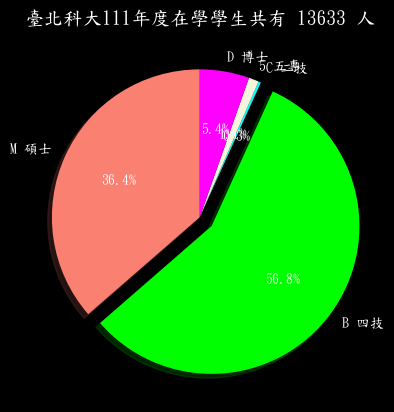

In [17]:
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager
from functools import reduce

'''
fontManager.addfont('NotoSansTC-Regular.otf')
matplotlib.rc('font', family='Noto Sans TC')
'''

plt.rcParams["font.sans-serif"] = "DFKai-SB"
plt.rcParams["axes.unicode_minus"] = False


datas=pd.read_csv('https://stats.moe.gov.tw/files/detail/111/111_student.csv')
degree_data=["M 碩士", "B 四技","C 二技","5 五專","D 博士"]
people_data=[]
for degree in degree_data:
    total = 0
    man = list(datas[(datas["學校名稱"]=="國立臺北科技大學") & (datas["等級別"]==degree)].loc[:,"總計"])
    for x in man:
        total+=int(x.replace(',',''))
    people_data.append(total)

plt.rcParams["font.sans-serif"] = "DFKai-SB" 
plt.rcParams["axes.unicode_minus"] = False

explode = [0 for i in range(len(degree_data))]
key = 0
index = 0
for i in range(len(people_data)):
    if key < people_data[i]:
        key = people_data[i]
        index = i
explode[index] = 0.1

colors = ["salmon", "lime", "aqua", "beige", 'magenta']    
patches, texts, autotexts = plt.pie(people_data, 
	explode = explode, 
	labels = degree_data, 
	colors = colors,
	labeldistance = 1.1, 
	autopct = "%2.1f%%",
	pctdistance = 0.6,
	shadow = True,
	startangle = 90)

people_total = reduce(lambda x,y: x+y, people_data)                                            
plt.title(f"臺北科大111年度在學學生共有 {people_total} 人", {"fontsize" : 14})
plt.show()

In [13]:
import numpy as np

lst1 = [1,2,3,4,5,6,7,8]
lst2 = [8,7,6,5,4,3,2,1]

lst1 = np.array(lst1)

lst2 = np.array(lst2)

length1 = len(lst1)
length2 = len(lst2)

for i in range(1, length1+1):
    if length1 % i == 0:
        k1 = lst1.reshape(i, 8//i)
        k2 = lst2.reshape(8//i, i)
        k3 = np.matmul(k1, k2)
        print(k1, k2, k3, sep='\n', end='\n\n')

[[1 2 3 4 5 6 7 8]]
[[8]
 [7]
 [6]
 [5]
 [4]
 [3]
 [2]
 [1]]
[[120]]

[[1 2 3 4]
 [5 6 7 8]]
[[8 7]
 [6 5]
 [4 3]
 [2 1]]
[[ 40  30]
 [120  94]]

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
[[8 7 6 5]
 [4 3 2 1]]
[[16 13 10  7]
 [40 33 26 19]
 [64 53 42 31]
 [88 73 58 43]]

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[[8 7 6 5 4 3 2 1]]
[[ 8  7  6  5  4  3  2  1]
 [16 14 12 10  8  6  4  2]
 [24 21 18 15 12  9  6  3]
 [32 28 24 20 16 12  8  4]
 [40 35 30 25 20 15 10  5]
 [48 42 36 30 24 18 12  6]
 [56 49 42 35 28 21 14  7]
 [64 56 48 40 32 24 16  8]]

